In [1]:
import pandas as pd
import torch
import numpy as np
import random
from random import shuffle
from matplotlib import pyplot as plt
import seaborn as sns
from torch.utils.data import TensorDataset, DataLoader
import wget
import os
import aiohttp
import asyncio
np.random.seed(17)
random.seed(17)
torch.manual_seed(17)
from fpl import FPL
from player import Player
from team import Team
from data_processor import get_fpl, get_players, get_teams, get_training_datasets
from models import PreviousScoreModel, PlayerAvgScoreModel, PlayerScoreLinearModel

In [2]:
fpl = await get_fpl()
opponent_feature_names = ["scored"]
player_feature_names = ["total_points", "ict_index", "clean_sheets"]
teams = get_teams(team_feature_names=opponent_feature_names, visualize=False)
players = await get_players(player_feature_names, visualize=False, num_players=590)
train_loader, test_loader = get_training_datasets(players, teams)
train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7f5aa0b7a850>,
 <torch.utils.data.dataloader.DataLoader at 0x7f5aa0b7a510>)

In [3]:
previous_score_model = PreviousScoreModel(player_feature_names, opponent_feature_names)
player_avg_score_model = PlayerAvgScoreModel(player_feature_names, opponent_feature_names)
player_linear_score_model = PlayerScoreLinearModel(player_feature_names, opponent_feature_names)

player_linear_score_model.fit(train_loader)
print(previous_score_model.eval(test_loader))
print(player_avg_score_model.eval(test_loader))
print(player_linear_score_model.eval(test_loader))

2.602259322288347
SpearmanrResult(correlation=0.5496545293971294, pvalue=1.1763467928512142e-247)
2.1485109175539576
SpearmanrResult(correlation=0.5876111286822426, pvalue=3.1061872992180765e-291)
1.6637261045146678
SpearmanrResult(correlation=0.5994227426167508, pvalue=5.230216940764733e-306)


torch.Size([3143, 3, 4])


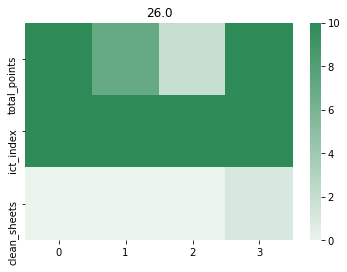

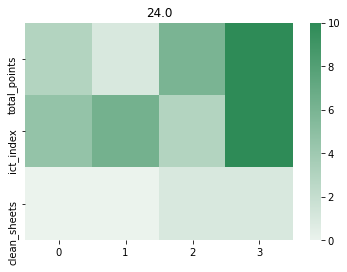

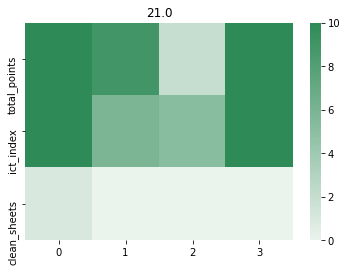

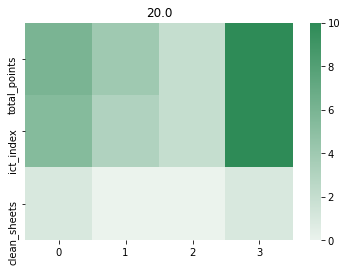

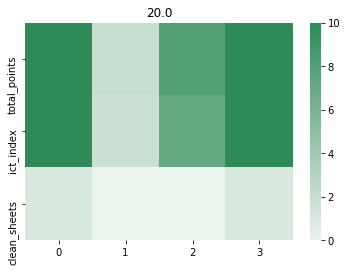

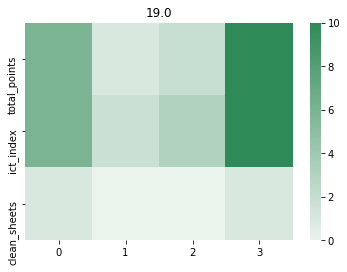

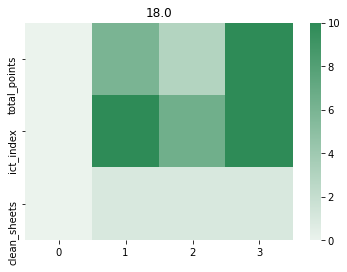

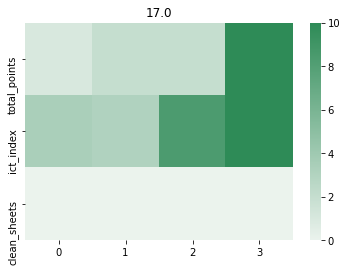

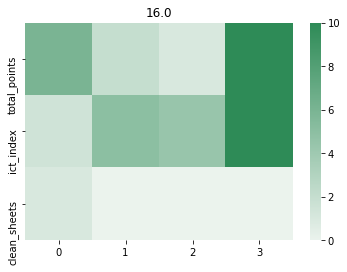

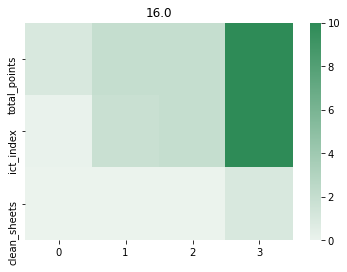

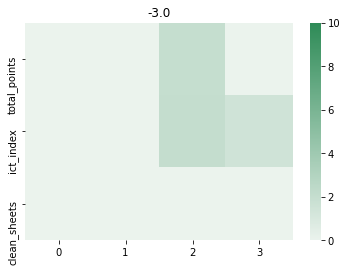

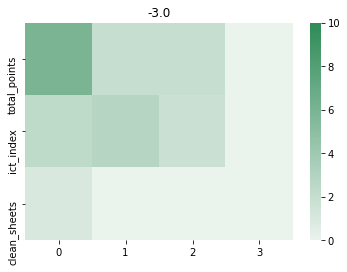

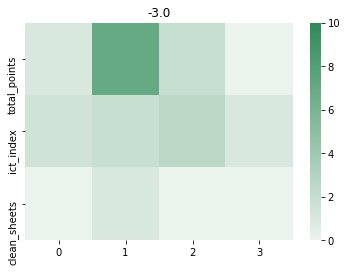

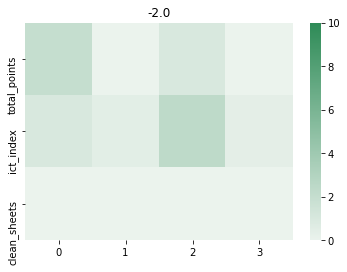

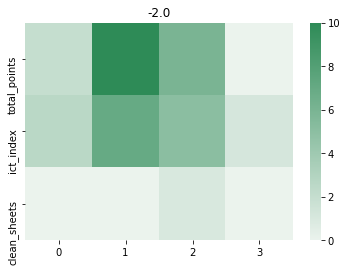

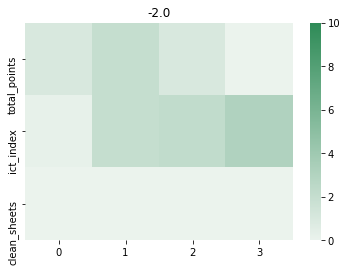

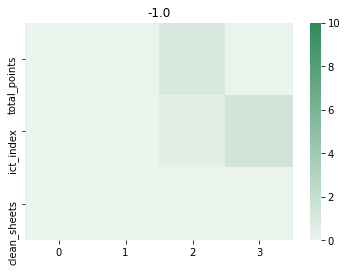

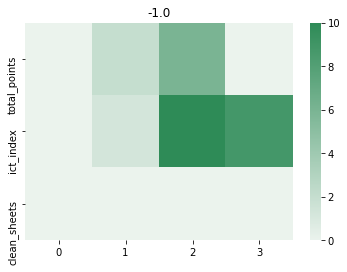

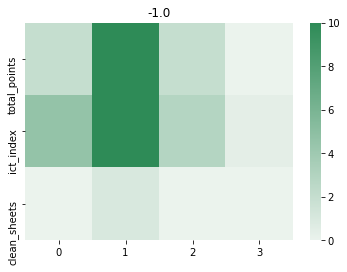

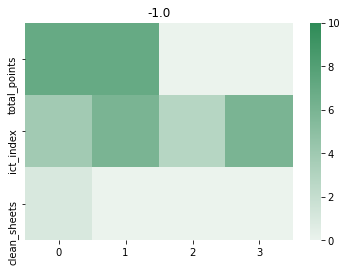

In [4]:
previous_score_model.visualize_predictions(test_loader)

torch.Size([3143, 3, 4])


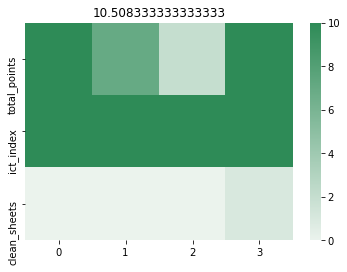

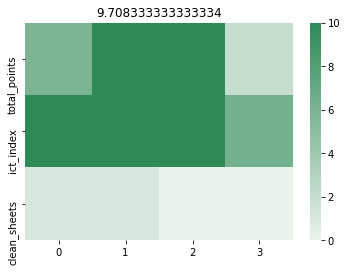

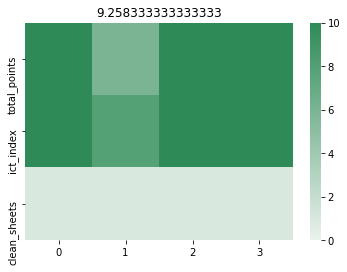

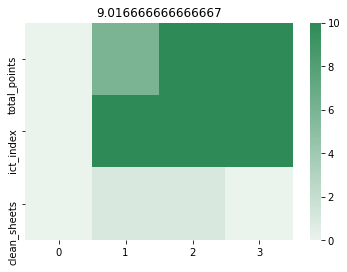

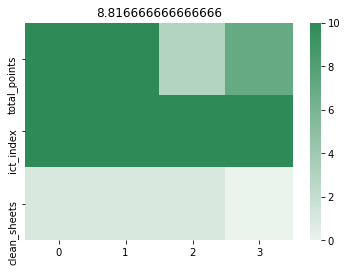

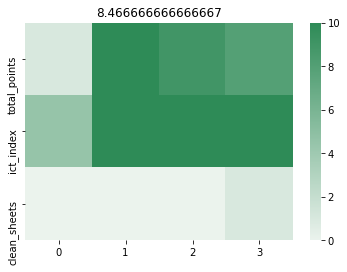

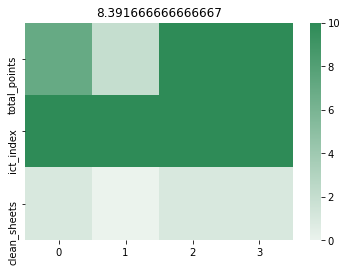

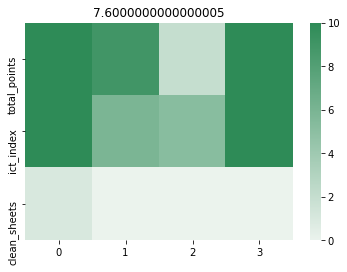

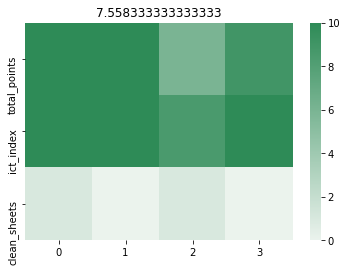

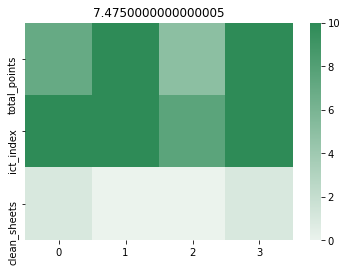

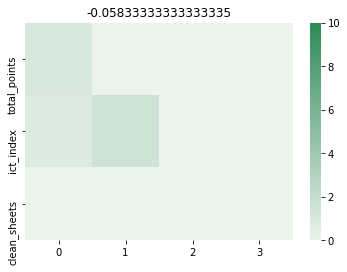

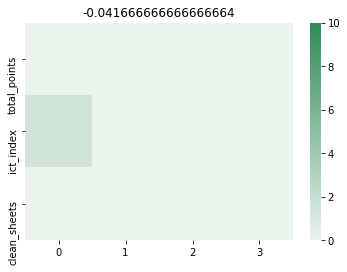

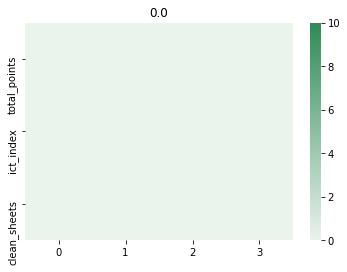

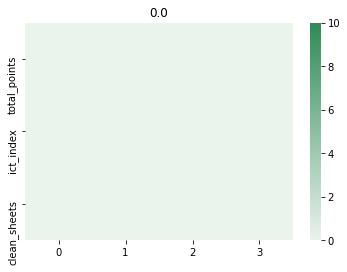

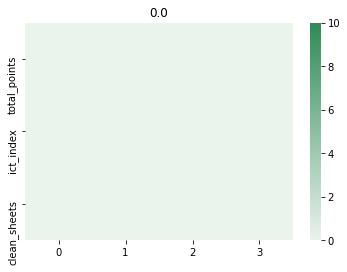

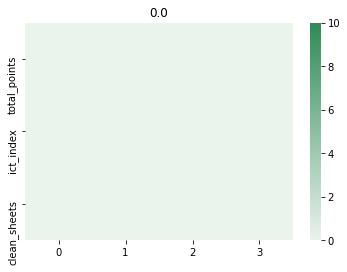

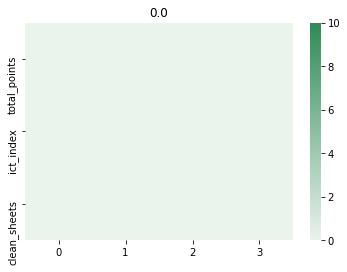

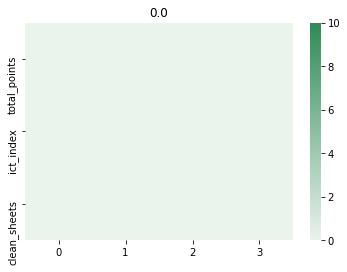

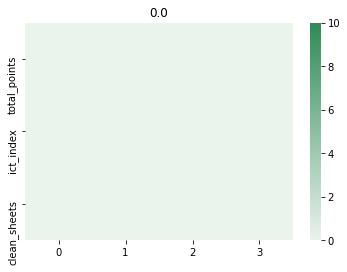

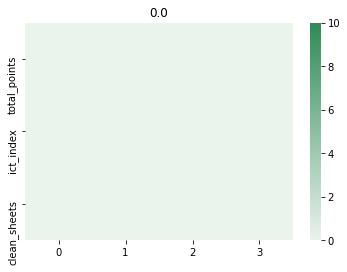

In [5]:
player_avg_score_model.visualize_predictions(test_loader)

torch.Size([3143, 12])


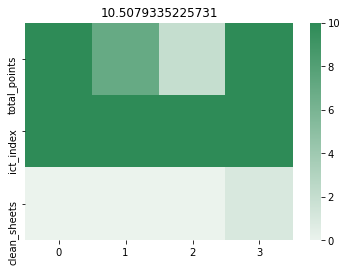

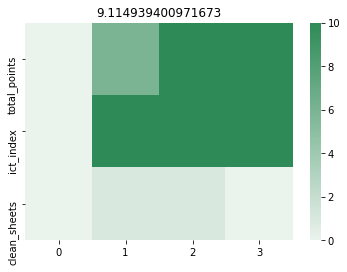

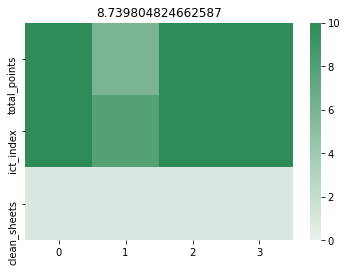

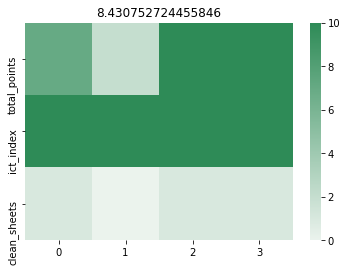

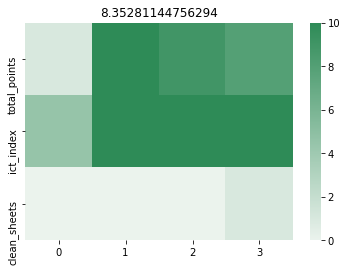

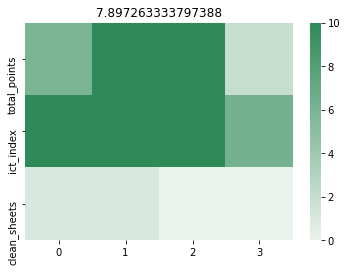

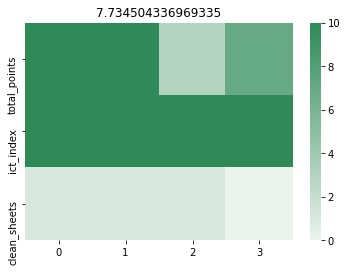

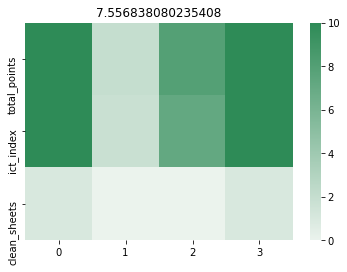

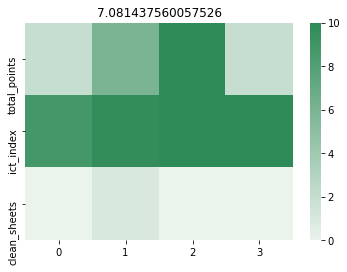

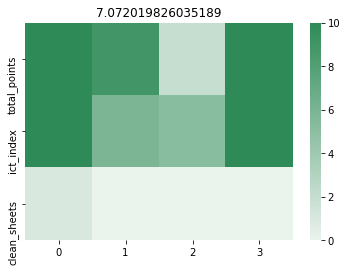

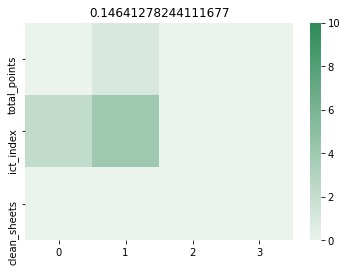

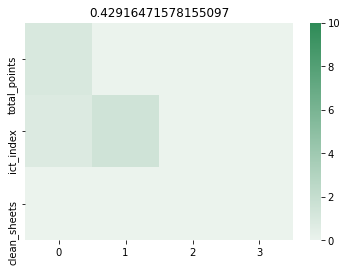

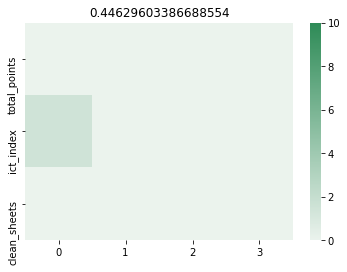

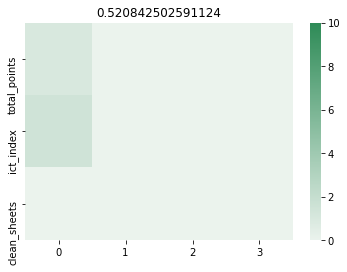

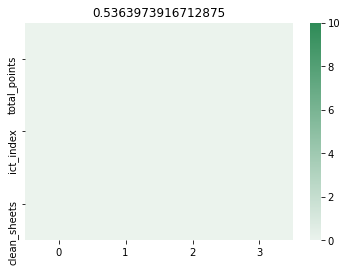

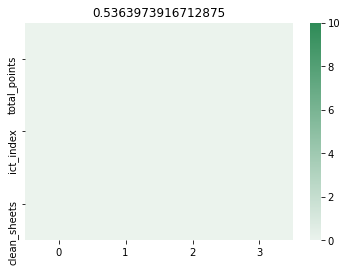

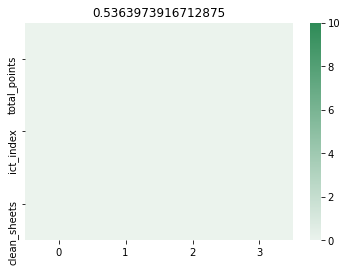

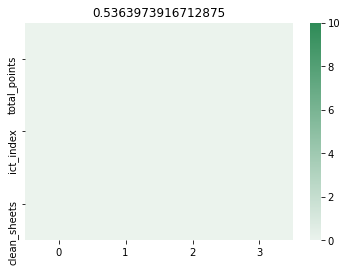

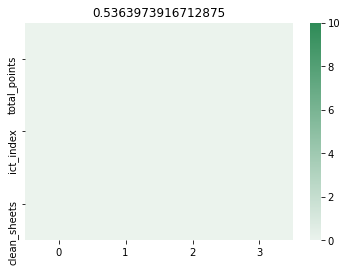

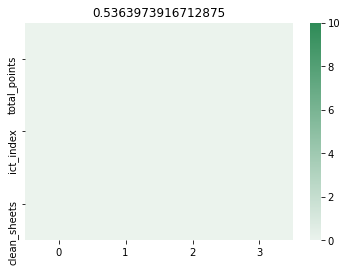

In [16]:
player_linear_score_model.visualize_predictions(test_loader)

In [17]:
list(player_linear_score_model.model.parameters())

[Parameter containing:
 tensor([[ 0.0713,  0.0696,  0.1222,  0.0609,  0.0349,  0.0480,  0.0430,  0.1325,
          -0.0339,  0.1465, -0.0886,  0.3126]], dtype=torch.float64,
        requires_grad=True),
 Parameter containing:
 tensor([0.5364], dtype=torch.float64, requires_grad=True)]